## Dataset
The data-set is the affairs dataset that comes with Statsmodels. It is derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about participating in extramarital affairs. More information about the study is available in  1978 paper from the Journal of Political Economy.

## Description of Variables
The dataset contains 6366 observations of 9 variables:

- rate_marriage: women’s rating of her marriage (1 = very poor, 5 = very good)
- age: women’s age
- yrs_married: number of years married
- children: number of children
- religious: women’s rating of how religious she is (1 = not religious, 4 = strongly religious)
- educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
- occupation:occupation of women(1 = student, 2 = farming/semi-skilled/unskilled, 3 = “white collar”, 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
- occupation_husb: occupation of husband (same coding as above)
- affairs: time spent in extra-marital affairs
    
## Problem Statement
 Determine whether woman were engaged in extra-marrital affair or not

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from __future__ import unicode_literals

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = sm.datasets.fair.load_pandas().data
data.head().style.background_gradient(cmap='plasma')

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.000000,32.000000,9.000000,3.000000,3.000000,17.000000,2.000000,5.000000,0.111111
1,3.000000,27.000000,13.000000,3.000000,1.000000,14.000000,3.000000,4.000000,3.230769
2,4.000000,22.000000,2.500000,0.000000,1.000000,16.000000,3.000000,5.000000,1.400000
3,4.000000,37.000000,16.500000,4.000000,3.000000,16.000000,5.000000,5.000000,0.727273
4,5.000000,27.000000,9.000000,1.000000,1.000000,14.000000,3.000000,4.000000,4.666666


### Most Important Step -
This is a clear Classification problem, so its important to convert target variable (affairs) into binary class. 
- affair = 1
- no_affair = 0

In [3]:
data['affairs'] = (data.affairs > 0).astype(int) # If the value is greater than 0, then person will belong to class 1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 422.9 KB


- There are total 6366 entries with 9 features( 8 dependent and 1 independent)

In [5]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

- Great, there are no missing values in the dataset, let's proceed

In [6]:
data.describe().style.background_gradient(cmap='plasma')

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


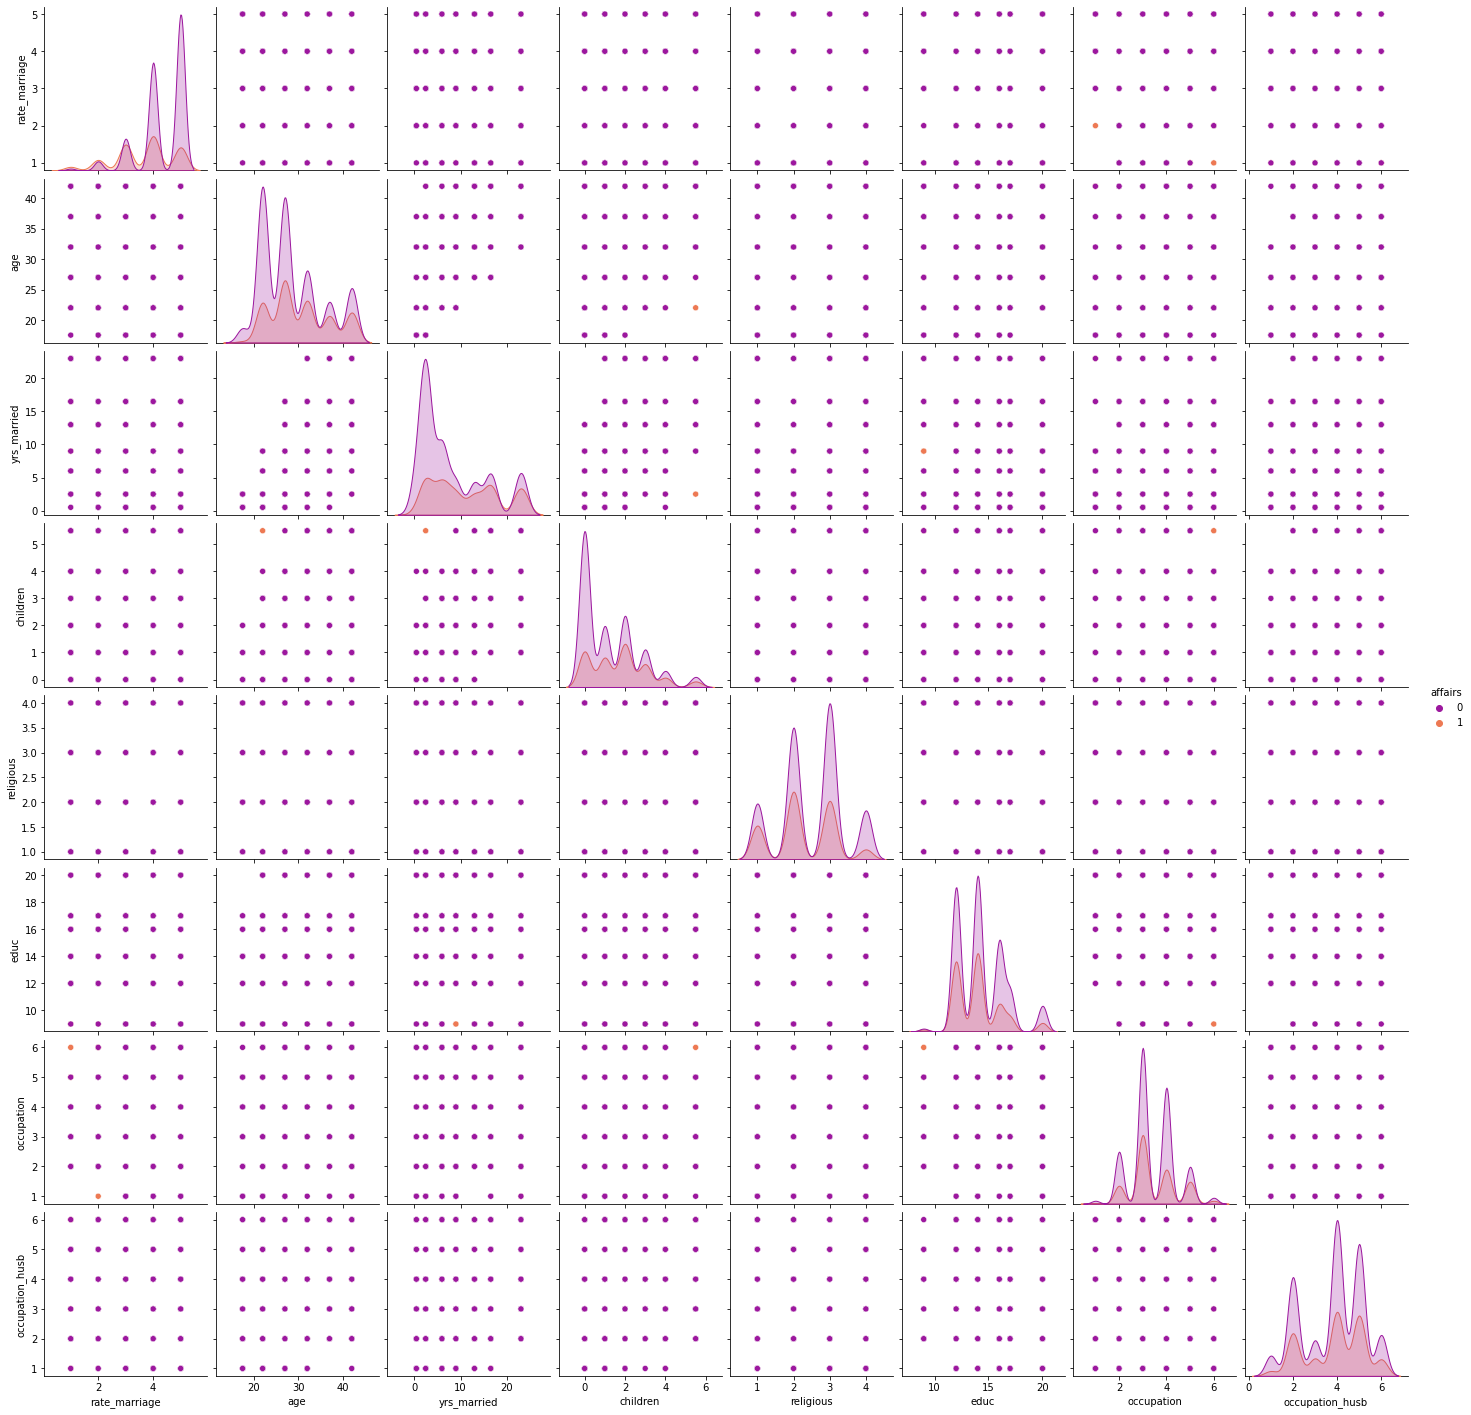

In [7]:
sns.pairplot(data,hue='affairs',palette='plasma')

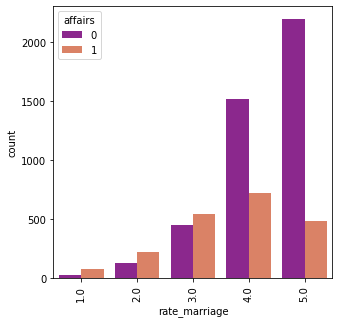

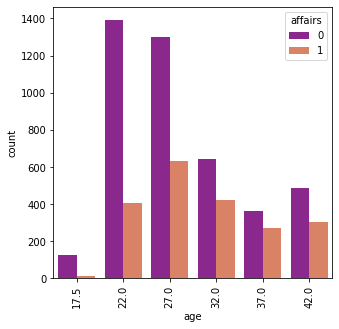

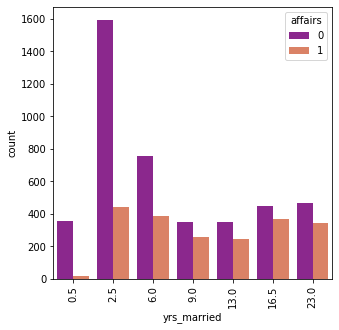

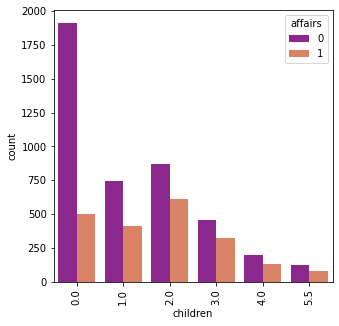

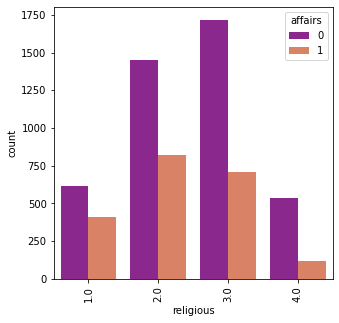

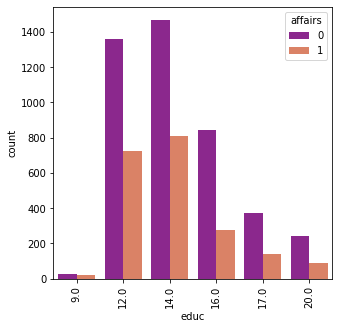

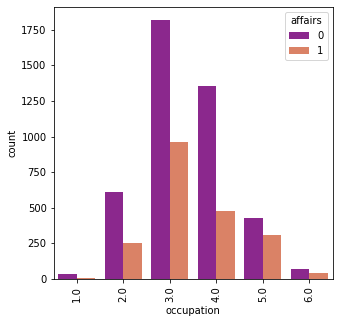

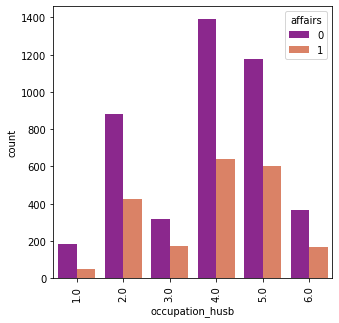

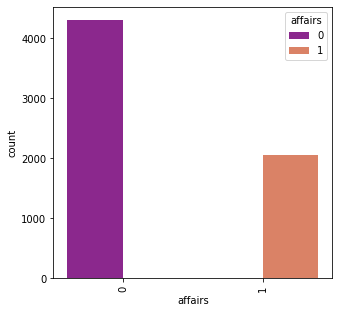

In [8]:
for col in data:

        plt.figure(figsize=(5,5))
        sns.countplot(data[col],hue=data['affairs'],palette='plasma')
        plt.xticks(rotation=90)
        plt.show()

### Few Observations- 
#### Women with these factors were engaged (highest count as per the above graph)in extra marrital affairs -
    1. With Marriage rating 4  
    2. Average Age 27
    3. Who had been married for 2.5 yrs
    4. Who did not have children
    5. Whose religious count was 2
    6. Whose Education rating was 14 ,occupation rating 3,husband's occupation 4 or 5
    
#### 2nd Approach to analyse this graph is to check women with no or less chances of having extra marrital affairs 
    1. Women with very good marriage rating i.e. 5. Of course, if they are happily married,no question of extra marrital affair
    2. Women who had strong religious beliefs.  
    2. Women who completed their  high school or college degrees.
    3. Women who were students (in the occupation categories) followed by the occupations in farming/semi-skilled/unskilled categories
 

- Surprisingly women completing high school and college degrees come in both categories,with and without affair.

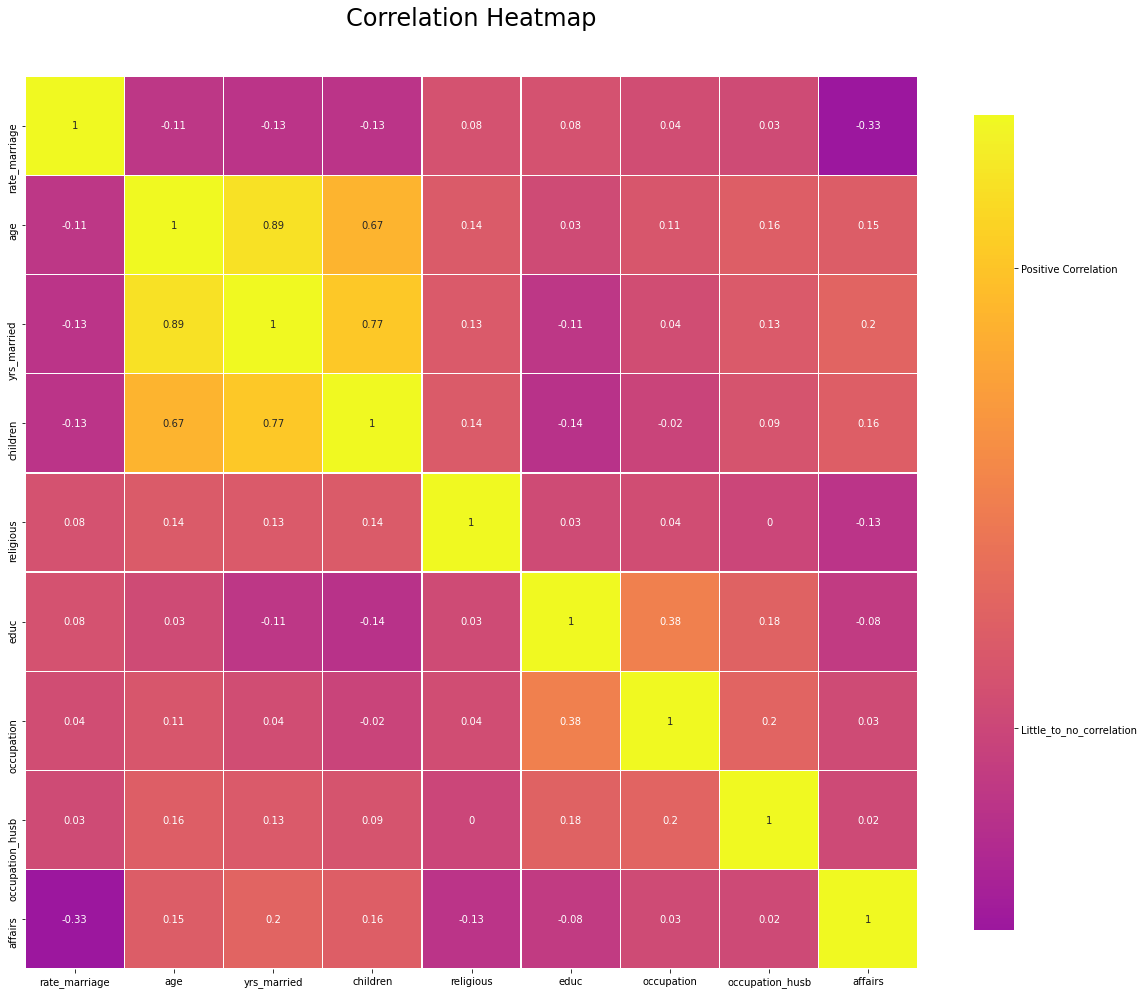

In [9]:
mask = np.triu(np.ones_like(data.corr()))
f,ax = plt.subplots(figsize=(20,20))
cmap= sns.color_palette("plasma",as_cmap=True)
sns.heatmap(data.corr().round(2),annot=True,cmap=cmap,vmax=1.0,center=0,square=True,lw=0.5,cbar_kws={"shrink":0.75})
ax.set_title('Correlation Heatmap', fontsize=24, y=1.05)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.75,0,0.75])
colorbar.set_ticklabels(['Negative_Correlation','Little_to_no_correlation','Positive Correlation'])

- age and children are highly correlated with each other i.e. 0.67
- childern and yrs_married are also correlated with each other i.e. 0.77
- age and yrs_married are correlated with each other i.e. 0.89

##### While feature selection, we will drop age and yrs_married features

In [10]:
X = data.drop(['affairs','age','yrs_married'],axis=1)
y = data['affairs']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1) 

In [12]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
y_train_predicted=model.predict(X_train)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,classification_report
print("train set accuracy score: ",accuracy_score(y_train,y_train_predicted))
print("test set accuracy score :",  accuracy_score(y_test,y_predicted))

train set accuracy score:  0.7173998428908092
test set accuracy score : 0.7291993720565149


In [14]:
 print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       872
           1       0.63      0.34      0.44       402

    accuracy                           0.73      1274
   macro avg       0.69      0.62      0.63      1274
weighted avg       0.71      0.73      0.70      1274



In [15]:
print("your prediction is  :",model.predict(np.array([[5,2,4,12,3,4]])))

your prediction is  : [0]


- Woman had no affair

In [16]:
print("your prediction is  :",model.predict(np.array([[1,2,4,12,3,4]])))

your prediction is  : [1]


- Woman had an affair